In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_context("talk")
%matplotlib inline

# Create DataSet And Make It A DataFrame 

In [25]:
df = [(2, 1), (1, 2), (3,4)]

In [26]:
df = pd.DataFrame(df, columns= ['X', 'Y'])

# Visualize and Split Data

In [27]:
df['X']

0    2
1    1
2    3
Name: X, dtype: int64

In [28]:
df['Y']

0    1
1    2
2    4
Name: Y, dtype: int64

In [29]:
y = df['Y']
x = df['X']

* Y mean

In [30]:
y_mean = y.mean()
y_mean

2.3333333333333335

* X Mean

In [31]:
x_mean = x.mean()
x_mean 

2.0

* Mean Of X square

In [32]:
x_mean_square = x_mean**2
x_mean_square

4.0

In [33]:
x_mean_y_mean =  x_mean * y_mean 
x_mean_y_mean

4.666666666666667

In [34]:
xy_mean = (x*y).mean()

In [35]:
x_square_mean = (x**2).mean()

In [36]:
m = ((x_mean*y_mean) - xy_mean)/(x_mean_square-x_square_mean)

In [37]:
m

0.9999999999999987

In [38]:
#bias (b) using ȳ-mx̄

In [39]:
b  = y_mean - (m*x_mean)
b

0.33333333333333615

In [40]:
y_pred =m*x+b  # Pridicted Y variables

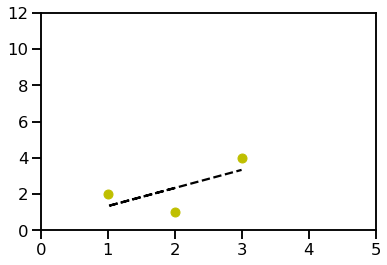

In [41]:

# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x,np.array(y_pred), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(0, 5)
plt.ylim(0, 12)
plt.show()

# TASK 2

### Import libraries

In [8]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import pandas as pd 
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import warnings

### Load The Boston DataSet Into X and y
    

In [9]:
with warnings.catch_warnings():
  warnings.filterwarnings("ignore")
  X, y = load_boston(return_X_y=True)
  data = np.column_stack((X,y))

### DATA PREPARATION
    1. Normalize the data for easier and faster computation
    2. Seperate the into features and target
    


In [10]:
data = normalize(data, norm='l2')
X = data[:,:13]  #input
y = data[:,13]   #target
print(X.shape)

(506, 13)


### Create Class For the regression for Easier Code Format
#### The Mean square error function is defined 
    1. deducts the predcted data from the actual data and takes its square (incase of negative)
    2. takes the sum of all these and devides it by the total number of targets
  PS: this is used to calculate the actual deviation (error) of the predicted values from the actual values , it can be used to deduce how well your algorithm performs 
  
#### The Fit Function calculates the slope m $ slope (m) = \frac {X^T y} {X^T X}  $

#### The  Predict takes the slopes (weight) calculated and multiplies it by the input to get the prediction
  


In [12]:
class LinearRegression:
    '''
    A class which implements linear regression model with gradient descent.
    '''
    def __init__(self):
        
        
        self.m = None
        self.loss = []
        
    @staticmethod
    def _mean_squared_error(y, y_hat):
        '''
        Private method, used to evaluate loss at each iteration.
        
        :param: y - array, true values
        :param: y_hat - array, predicted values
        :return: float
        '''
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
            # print(error)
        return error / len(y)
    
    def fit(self, xTrain, yTrain):
        a = np.linalg.inv((xTrain.T).dot(xTrain))
        b = (xTrain.T).dot(yTrain)
        self.m = a.dot(b)
        

        
        
    def predict(self, X):
        '''
        Makes predictions using the line equation.
        
        :param X: array, features
        :return: array, predictions
        '''
        return  X.dot(self.m)  

### Rearrage Data For Training

In [14]:
X_b = np.column_stack((np.ones((506, 0)), X))
# rearrange data
y = y.T
xTrain = X_b[:450,:]
yTrain = y[:450]

xTest = X_b[-56:,:]
yTest = y[-56:]

### Instantiate LinearRegression Class 
### fits it by calculating the slope (m)
### Predict the test data

In [17]:
model = LinearRegression()
model.fit(xTrain, yTrain)
preds = model.predict(xTrain)

### Plot the Model weights

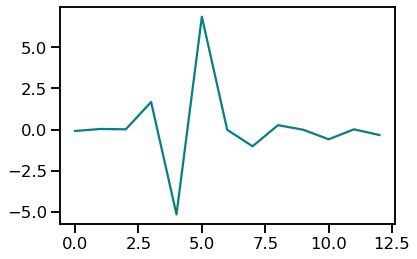

In [18]:

xs = model.m

plt.plot(xs, c='#087E8B')
plt.show()

### Testing the Model on the Test Data Set

In [19]:

preds = model.predict(xTest)

#model._mean_squared_error(y_test, preds)

In [21]:
# Predicted Output
preds

array([0.02650397, 0.02929207, 0.02653597, 0.0358012 , 0.02512786,
       0.02518197, 0.01810067, 0.01800359, 0.02587309, 0.02528338,
       0.02992273, 0.02834236, 0.02768363, 0.03081828, 0.02742749,
       0.0235971 , 0.01922431, 0.02255936, 0.02227177, 0.02269006,
       0.02611488, 0.02821758, 0.02978639, 0.03609282, 0.01859596,
       0.02273726, 0.02830925, 0.01387704, 0.0254161 , 0.02795029,
       0.02923198, 0.0348764 , 0.03775245, 0.02515159, 0.0249635 ,
       0.02938188, 0.02545856, 0.0263468 , 0.0127682 , 0.00935162,
       0.00370833, 0.0169587 , 0.01895418, 0.03499238, 0.03709136,
       0.03132494, 0.02430643, 0.03330292, 0.03780471, 0.03079048,
       0.03639237, 0.05247299, 0.04601124, 0.05981061, 0.05655681,
       0.04494799])

### Finding Input With Highest Weight

In [22]:
np.where(model.m==max(model.m))

(array([5]),)

In [46]:
boston = load_boston()
boston.feature_names[5]
# Feature name

/home/olamide/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

'RM'

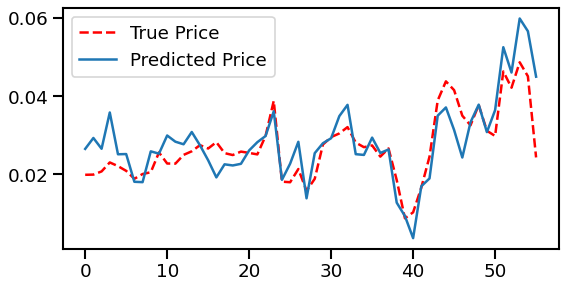

In [42]:
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(yTest, 'r--', preds)
plt.legend(['True Price', 'Predicted Price'], loc='upper left')
plt.show()

In [43]:
model.m

array([-0.08855942,  0.03508338,  0.01396845,  1.67216587, -5.15323435,
        6.84952512, -0.01580958, -1.01677804,  0.2662777 , -0.01378735,
       -0.59146695,  0.01471539, -0.33206519])

In [44]:
pd.DataFrame( model.m,boston.feature_names)

NameError: name 'boston' is not defined